In [1]:
import numpy as np
import pandas as pd

In [7]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os 

In [8]:
df = pd.read_csv('card_data\\cards.csv')

In [9]:
df.head(2)

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train


In [186]:
df['labels'].unique()

array(['ace of clubs', 'ace of diamonds', 'ace of hearts',
       'ace of spades', 'eight of clubs', 'eight of diamonds',
       'eight of hearts', 'eight of spades', 'five of clubs',
       'five of diamonds', 'five of hearts', 'five of spades',
       'four of clubs', 'four of diamonds', 'four of hearts',
       'four of spades', 'jack of clubs', 'jack of diamonds',
       'jack of hearts', 'jack of spades', 'joker', 'king of clubs',
       'king of diamonds', 'king of hearts', 'king of spades',
       'nine of clubs', 'nine of diamonds', 'nine of hearts',
       'nine of spades', 'queen of clubs', 'queen of diamonds',
       'queen of hearts', 'queen of spades', 'seven of clubs',
       'seven of diamonds', 'seven of hearts', 'seven of spades',
       'six of clubs', 'six of diamonds', 'six of hearts',
       'six of spades', 'ten of clubs', 'ten of diamonds',
       'ten of hearts', 'ten of spades', 'three of clubs',
       'three of diamonds', 'three of hearts', 'three of spades',

In [10]:
df['class index'].nunique() , df['labels'].nunique() ,df['data set'].unique()

(53, 53, array(['train', 'test', 'valid'], dtype=object))

In [14]:
base_path = 'card_data/'
img_path = df.filepaths[4] 
img_p = os.path.join(base_path , img_path) 

In [15]:
img_p

'card_data/train/ace of clubs/005.jpg'

In [16]:
img = cv2.imread(img_p)

In [17]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(224, 224, 3)

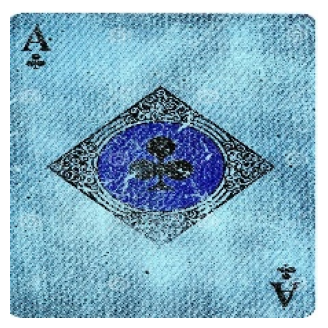

In [18]:
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis('off')
plt.show()

## Resize the Image

(120, 120, 3)


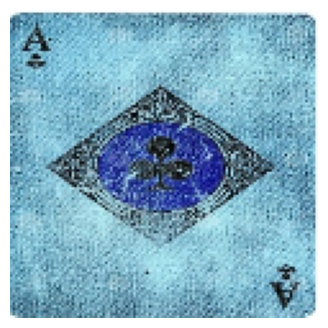

In [43]:
img_resized = cv2.resize(img, (120, 120))
print(img_resized.shape)
# plot img resize
plt.figure(figsize=(4,4))
plt.imshow(img_resized)
plt.axis('off')
plt.show()

In [20]:
float(img_resized.max()) ,img_resized.min()

(255.0, np.uint8(0))

## Resize and Rescalar Color image 

(120, 120, 3)
1.0 0.0


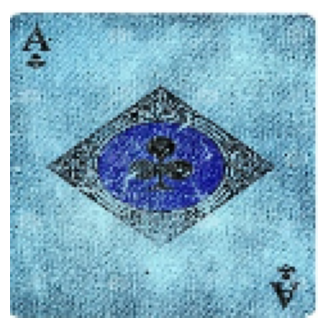

In [21]:
img_rescaled = img_resized.astype('float32') / float(img_resized.max())
print(img_rescaled.shape)
print(img_rescaled.max(), img_rescaled.min())
## Plot gray size image Rescaled
plt.figure(figsize=(4,4))
plt.imshow(img_rescaled)
plt.axis('off')
plt.show()

## Convert into Gray Image

In [44]:
# img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
# print(img_gray.shape)
# print(img_gray.max(), img_gray.min())
# ## Plot gray size image
# plt.figure(figsize=(4,4))
# plt.imshow(img_gray)
# plt.axis('off')
# plt.show()

In [45]:
# img_gray_rescaled = img_gray.astype('float32') / float(img_resized.max())
# print(img_gray_rescaled.shape)
# print(img_gray_rescaled.max(), img_gray_rescaled.min())
# ## Plot gray size image
# plt.figure(figsize=(4,4))
# plt.imshow(img_gray)
# plt.axis('off')
# plt.show()

## Add new Dimension at the last 

In [46]:
# img_ = np.expand_dims(img_gray_rescaled,axis=-1)
# print(img_.shape)
# print(img_.min(),img_.max())

## Lets create the train test and validation set

In [25]:
np.zeros([100,100,1],dtype=int).shape

(100, 100, 1)

In [ ]:
im_size = (120,120)

def resize_gray_rescale(img_path):
    img = cv2.imread(img_path,cv2.IMREAD_COLOR_RGB)
    if img is None:
        print(f"[WARNING] Could not read image: {img_path}")
        return np.zeros([im_size[0],im_size[1],3],dtype=int)
    img_resized = cv2.resize(img, (im_size[0],im_size[1]), interpolation=cv2.INTER_AREA)

    img_gray_rescaled_array = img_resized.astype('float32') / 224.0
    
    return img_gray_rescaled_array


(120, 120, 3)

In [96]:
im_size = (120,120)

def resize_gray_rescale(img_path):
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"[WARNING] Could not read image: {img_path}")
        return np.zeros([im_size[0],im_size[1],1],dtype=int)
    img_resized = cv2.resize(img, (im_size[0],im_size[1]), interpolation=cv2.INTER_AREA)

    img_gray_rescaled_array = img_resized.astype('float32') / 224.0
    
    img_ = np.expand_dims(img_gray_rescaled_array,axis=-1)

    return img_


train_array = []
train_labels = []
test_array = []
test_labels = []
valid_array = []
valid_labels = []
class_label = []

for i,row in tqdm(df.iterrows(), total=len(df), desc="Processing images"):
    if row['data set']== 'train':
        img_path = f'{base_path}/{row["filepaths"]}'
        train_label = row['class index']
        train_img_array = resize_gray_rescale(img_path)
        train_array.append(train_img_array)
        train_labels.append(train_label)
        class_label.append(row['labels'])
    elif row['data set'] == 'test':
        img_path = f'{base_path}/{row["filepaths"]}'
        test_label = row['class index']
        test_img_array = resize_gray_rescale(img_path)
        test_array.append(test_img_array)
        test_labels.append(test_label)
        class_label.append(row['labels'])
    else:
        img_path = f'{base_path}/{row["filepaths"]}'
        valid_label = row['class index']
        valid_img_array = resize_gray_rescale(img_path)
        valid_array.append(valid_img_array)
        valid_labels.append(valid_label)
        class_label.append(row['labels'])
        
        

Processing images:   5%|▍         | 392/8155 [00:00<00:05, 1326.70it/s]

[WARNING] Could not read image: card_data//train/ace of clubs/output


Processing images:  97%|█████████▋| 7893/8155 [00:06<00:00, 1339.22it/s]

[WARNING] Could not read image: card_data//test/ace of clubs/1.jpg
[WARNING] Could not read image: card_data//test/ace of clubs/2.jpg
[WARNING] Could not read image: card_data//test/ace of clubs/3.jpg
[WARNING] Could not read image: card_data//test/ace of clubs/4.jpg
[WARNING] Could not read image: card_data//test/ace of clubs/5.jpg
[WARNING] Could not read image: card_data//test/ace of diamonds/1.jpg
[WARNING] Could not read image: card_data//test/ace of diamonds/2.jpg
[WARNING] Could not read image: card_data//test/ace of diamonds/3.jpg
[WARNING] Could not read image: card_data//test/ace of diamonds/4.jpg
[WARNING] Could not read image: card_data//test/ace of diamonds/5.jpg
[WARNING] Could not read image: card_data//test/ace of hearts/1.jpg
[WARNING] Could not read image: card_data//test/ace of hearts/2.jpg
[WARNING] Could not read image: card_data//test/ace of hearts/3.jpg
[WARNING] Could not read image: card_data//test/ace of hearts/4.jpg
[WARNING] Could not read image: card_data//

Processing images: 100%|██████████| 8155/8155 [00:06<00:00, 1190.89it/s]


In [97]:
for i in train_array:
    if len(i)==1:
        print(i)

In [98]:
X_train = np.array(train_array)
y_train = np.array(train_labels)
print(X_train.shape)
print(y_train.shape)

X_test = np.array(test_array)
y_test = np.array(test_labels)
print(X_test.shape)
print(y_test.shape)

X_valid = np.array(valid_array)
y_valid = np.array(valid_labels)
print(X_valid.shape)
print(y_valid.shape)



(7625, 120, 120, 1)
(7625,)
(265, 120, 120, 1)
(265,)
(265, 120, 120, 1)
(265,)


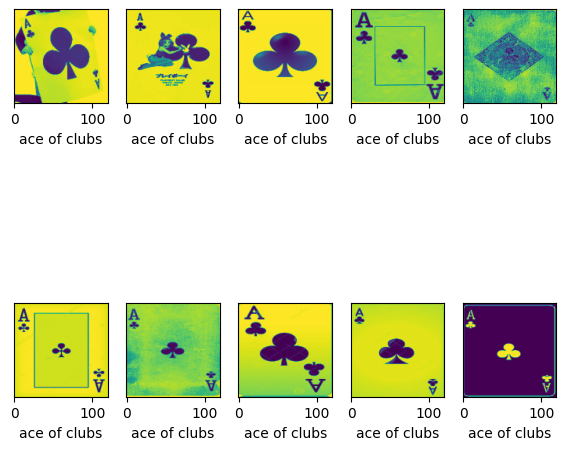

In [99]:
plt.figure(figsize=(7,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    #plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_label[y_train[i]])
plt.show()


In [100]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras import models, layers, optimizers



In [101]:
# ## Data Augumantation 

# data_augmentation  = models.Sequential(
#     [
#         RandomRotation(factor=(-0.2,0.2)) , 
#         RandomFlip(mode='horizantal_and_vertical')
#     ]
# )


In [102]:

# resize_and_rescale = Sequential(
#     [
#         Resizing(im_size,im_size) , 
#         Rescaling(1./255)
#     ]
# )


In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation , Resizing , Rescaling,RandomRotation,RandomFlip,Dropout


In [104]:
# from tensorflow.keras.applications import MobileNetV2
# cnn_image = MobileNetV2(include_top=False , input_shape=(120,120,3),weights='imagenet',pooling='avg')
# cnn_image.trainable = True

In [105]:
card_model = Sequential([
    # ----Input Block and data augmentation and rescale 
    InputLayer(input_shape=(im_size[0], im_size[1], 1)),
    #data_augmentation ,
    #resize_and_rescale,

    

    # ----- Block 1 -----
    Conv2D(filters=10, kernel_size=5, strides=1, padding='valid'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=2, strides=2),

    # ----- Block 2 -----
    Conv2D(filters=6, kernel_size=5, strides=1, padding='valid'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=2, strides=2),
     
    # ----- Classifier Head -----
    Flatten(),
    Dense(100),
    BatchNormalization(),
    Activation('relu'),

    Dense(10),
    BatchNormalization(),
    Activation('relu'),

    # Output layer for binary classification
    Dense(53, activation='softmax') 
])


d:\ML_DL_Project\Computer Vision\p3\cls_venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# card_model = Sequential(
#     [
#     cnn_image ,
#     Dense(10, activation = 'relu'),
#     BatchNormalization(),
#     Dropout(0.4),
#     Dense(53, activation='softmax') 
# ]
# )


In [106]:
card_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 116, 116, 10)   │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 116, 116, 10)   │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 116, 116, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 58, 58, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 54, 54, 6)      │         1,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 54, 54, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 54, 54, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 27, 27, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4374)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │       437,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 53)             │           583 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 441,363 (1.68 MB)

 Trainable params: 441,111 (1.68 MB)

 Non-trainable params: 252 (1008.00 B)

In [107]:
card_model.compile(optimizer=optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [108]:
hist = card_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_valid, y_valid))


Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - accuracy: 0.1155 - loss: 3.6075 - val_accuracy: 0.1132 - val_loss: 3.6854
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.2783 - loss: 3.0036 - val_accuracy: 0.3434 - val_loss: 2.8284
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.4278 - loss: 2.4093 - val_accuracy: 0.5057 - val_loss: 2.0698
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.5759 - loss: 1.8566 - val_accuracy: 0.5170 - val_loss: 1.7574
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.6960 - loss: 1.4148 - val_accuracy: 0.5623 - val_loss: 1.7190
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.7864 - loss: 1.0468 - val_accuracy: 0.6189 - val_loss: 1.5954
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.8472 - loss: 0.7737 - val_accuracy: 0.6113 - val_loss: 1.5686
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.8950 - loss: 0.5681 - 

In [184]:
results = card_model.evaluate(X_valid, y_valid, batch_size=32)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6943 - loss: 1.7271


In [110]:
test_df = df[df['data set']=='test'].copy()

In [111]:
test_df.head(2)

,class index,filepaths,labels,card type,data set
7625,0,test/ace of clubs/1.jpg,ace of clubs,ace,test
7626,0,test/ace of clubs/2.jpg,ace of clubs,ace,test


In [138]:
t = 'card_data\\test\\jack of hearts\\3.jpg'
img_arr = cv2.imread(t, cv2.IMREAD_GRAYSCALE)
img_arr = cv2.resize(img_arr,(120,120))
print(img_arr.shape)
img_arr = np.expand_dims(img_arr, axis=0)
print(img_arr.shape)
pred = card_model.predict(img_arr)
class_idx = np.argmax(pred)
test_df.loc[test_df['class index']==class_idx,'labels'].values[0]

(120, 120)
(1, 120, 120)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


'ten of clubs'

In [123]:
# class_idx_l = []
# for i ,row in test_df.iterrows():
#     if  isinstance(row['filepaths'],str):
#         img_path = f'{base_path}/{row["filepaths"]}'
#         img_arr_y = cv2.imread(os.path.join(img_path), cv2.IMREAD_GRAYSCALE)
#         img_arr_y = cv2.resize(img_arr_y,(120,120))
#         #print(img_arr.shape)
#         img_arr_y = np.expand_dims(img_arr_y, axis=0)
#         #print(img_arr.shape)
#         pred = card_model.predict(img_arr_y,verbose=False)
#         class_idx = np.argmax(pred)
#         class_idx_l.append(class_idx)
# test_df['prediction'] = class_idx_l

        

In [139]:
def card_classification(t):
    img_arr = cv2.imread(t, cv2.IMREAD_GRAYSCALE)
    img_arr = cv2.resize(img_arr,(120,120))
    img_arr = np.expand_dims(img_arr, axis=0)
    pred = card_model.predict(img_arr,verbose=False)
    class_idx = np.argmax(pred)
    return test_df.loc[test_df['class index']==class_idx,'labels'].values[0]


In [155]:
card_classification(t)

'ten of clubs'

In [179]:
import gradio as gr

theme = gr.themes.Ocean(primary_hue='blue',secondary_hue='cyan').set(
    body_background_fill_dark='#44444E' ,
    block_background_fill="#D3DAD9")


In [180]:
with gr.Blocks(theme=theme) as demo:
    gr.Markdown('## Card Classification')
    img = gr.Image(type="filepath", label="Upload Image")
    btn = gr.Button('Predict')
    out = gr.Textbox(label="Prediction")
    btn.click(card_classification, inputs=[img], outputs=out)

    

In [181]:
demo.launch()

* Running on local URL:  http://127.0.0.1:7871
* To create a public link, set `share=True` in `launch()`.
